Epoch 0, Cost: 1.5818
Epoch 100, Cost: 1.5665
Epoch 200, Cost: 1.4445
Epoch 300, Cost: 1.7038
Epoch 400, Cost: 0.9102
Epoch 500, Cost: 0.8184
Epoch 600, Cost: 0.8352
Epoch 700, Cost: 0.8543
Epoch 800, Cost: 1.0508
Epoch 900, Cost: 0.8262

Final learned parameters:
Intercept (theta[0]): 4.1721
Slope     (theta[1]): 2.7256


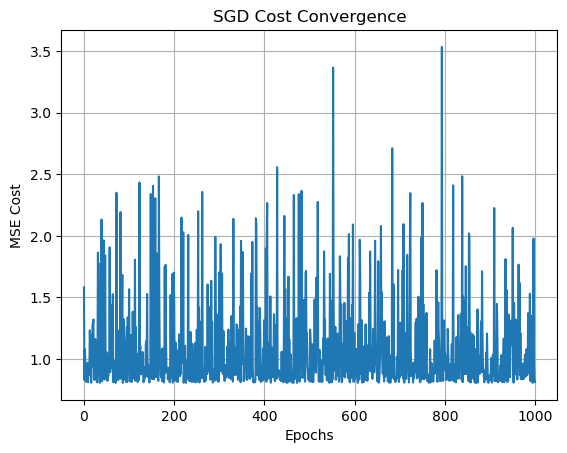

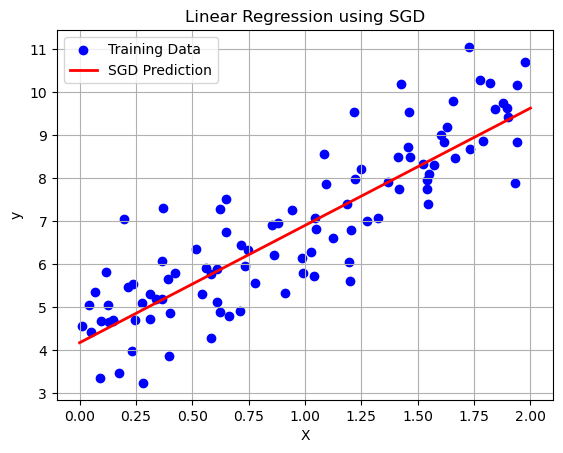

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Synthetic Data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# 2. Define the SGD Function
def sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1):
    m = len(X)
    theta = np.random.randn(2, 1)  # Initialize weights (bias + slope)
    
    # Add bias term (x0 = 1)
    X_bias = np.c_[np.ones((m, 1)), X]  # Shape: (m, 2)
    cost_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)  # Shuffle data each epoch
        X_shuffled = X_bias[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            # Compute gradients
            gradients = 2 / batch_size * X_batch.T.dot(X_batch.dot(theta) - y_batch)

            # Update theta
            theta -= learning_rate * gradients

        # Calculate and store cost
        predictions = X_bias.dot(theta)
        cost = np.mean((predictions - y) ** 2)
        cost_history.append(cost)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.4f}")

    return theta, cost_history

# 3. Train the Model Using SGD
theta_final, cost_history = sgd(X, y, learning_rate=0.1, epochs=1000, batch_size=1)

# 4. Print Final Model Parameters
print("\nFinal learned parameters:")
print(f"Intercept (theta[0]): {theta_final[0][0]:.4f}")
print(f"Slope     (theta[1]): {theta_final[1][0]:.4f}")

# 5. Plot Cost Over Epochs
plt.plot(cost_history)
plt.xlabel("Epochs")
plt.ylabel("MSE Cost")
plt.title("SGD Cost Convergence")
plt.grid(True)
plt.show()

# 6. Plot Regression Line
X_new = np.array([[0], [2]])
X_new_bias = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_bias.dot(theta_final)

plt.scatter(X, y, color="blue", label="Training Data")
plt.plot(X_new, y_predict, color="red", linewidth=2, label="SGD Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression using SGD")
plt.legend()
plt.grid(True)
plt.show()
